In [ ]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### The Data

We will be using data from a Kaggle data set:

https://www.kaggle.com/harlfoxem/housesalesprediction
Feature Columns

    id - Unique ID for each home sold
    date - Date of the home sale
    price - Price of each home sold
    bedrooms - Number of bedrooms
    bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
    sqft_living - Square footage of the apartments interior living space
    sqft_lot - Square footage of the land space
    floors - Number of floors
    waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
    view - An index from 0 to 4 of how good the view of the property was
    condition - An index from 1 to 5 on the condition of the apartment,
    grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
    sqft_above - The square footage of the interior housing space that is above ground level
    sqft_basement - The square footage of the interior housing space that is below ground level
    yr_built - The year the house was initially built
    yr_renovated - The year of the house’s last renovation
    zipcode - What zipcode area the house is in
    lat - Lattitude
    long - Longitude
    sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
    sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors



In [2]:
df = pd.read_csv('./DATA/kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


## EDA

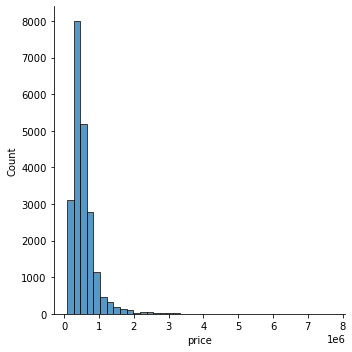

In [11]:
sns.displot(data=df['price'],bins=40)

<AxesSubplot:xlabel='id', ylabel='price'>

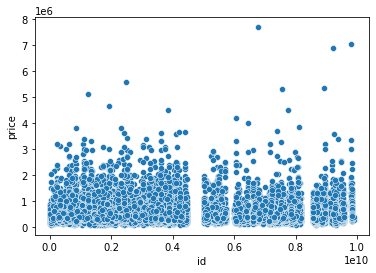

In [12]:
sns.scatterplot(x='id',y='price',data=df)

<AxesSubplot:xlabel='bedrooms', ylabel='count'>

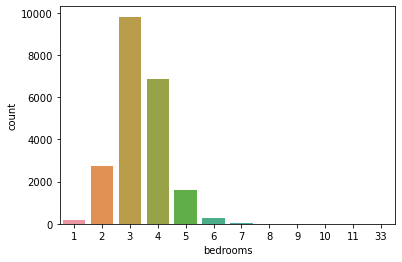

In [14]:
sns.countplot(x='bedrooms',data=df)

In [22]:
df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='sqft_living'>

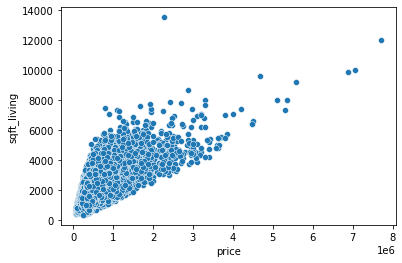

In [24]:
sns.scatterplot(x='price',y='sqft_living',data=df)

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

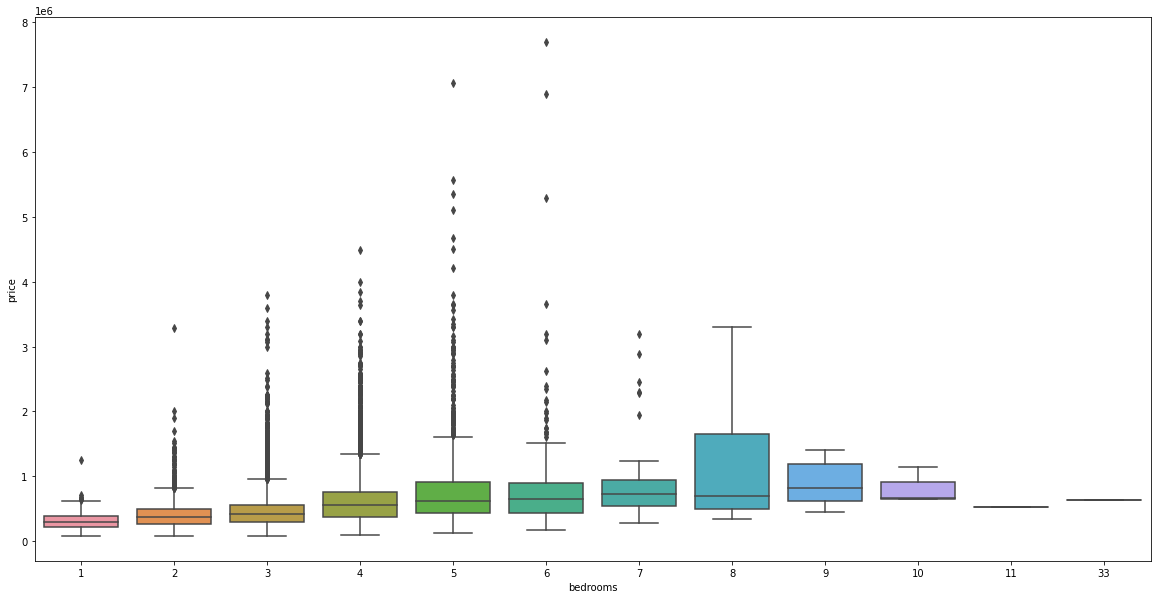

In [27]:
plt.figure(figsize=(20,10))
sns.boxplot(x='bedrooms',y='price',data=df)

<AxesSubplot:xlabel='price', ylabel='long'>

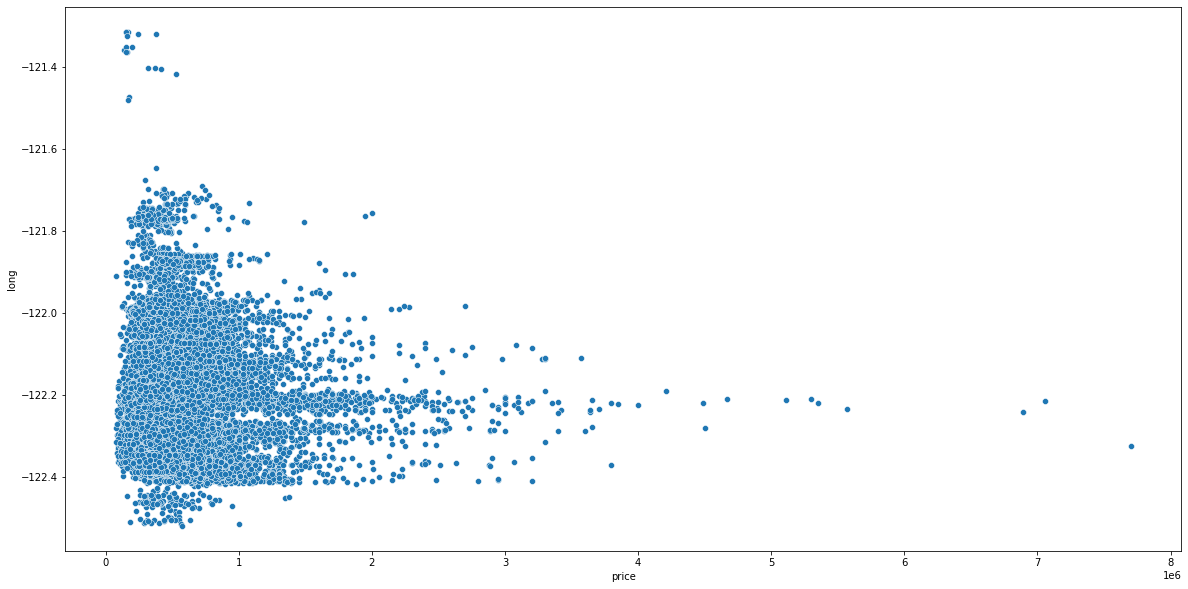

In [30]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='price',y='long',data=df)

<AxesSubplot:xlabel='price', ylabel='lat'>

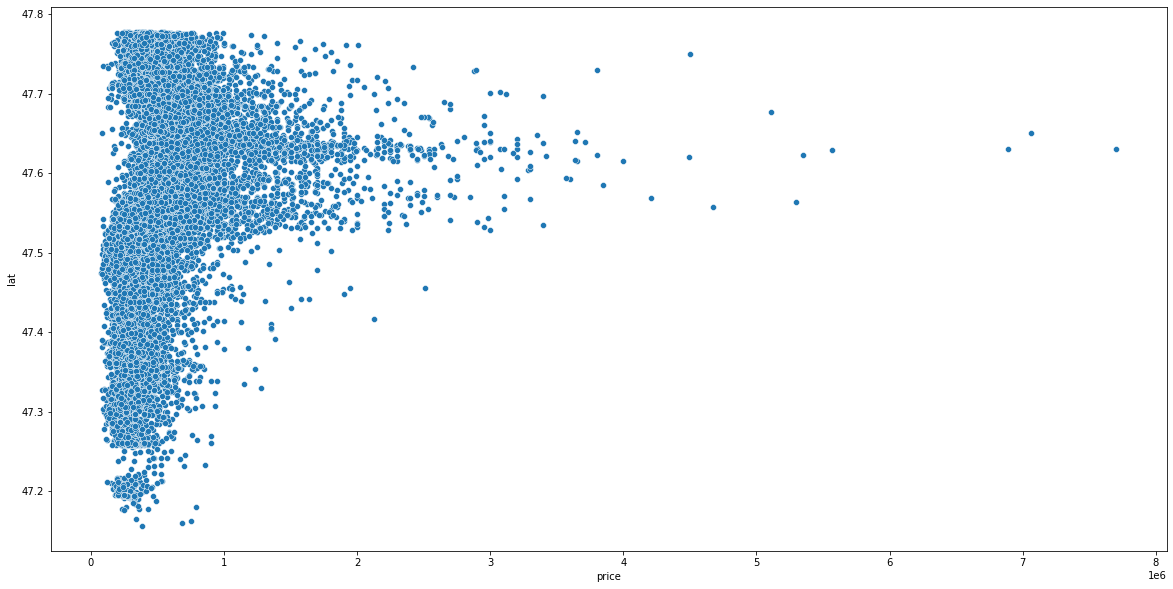

In [31]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='price',y='lat',data=df)

<AxesSubplot:xlabel='long', ylabel='lat'>

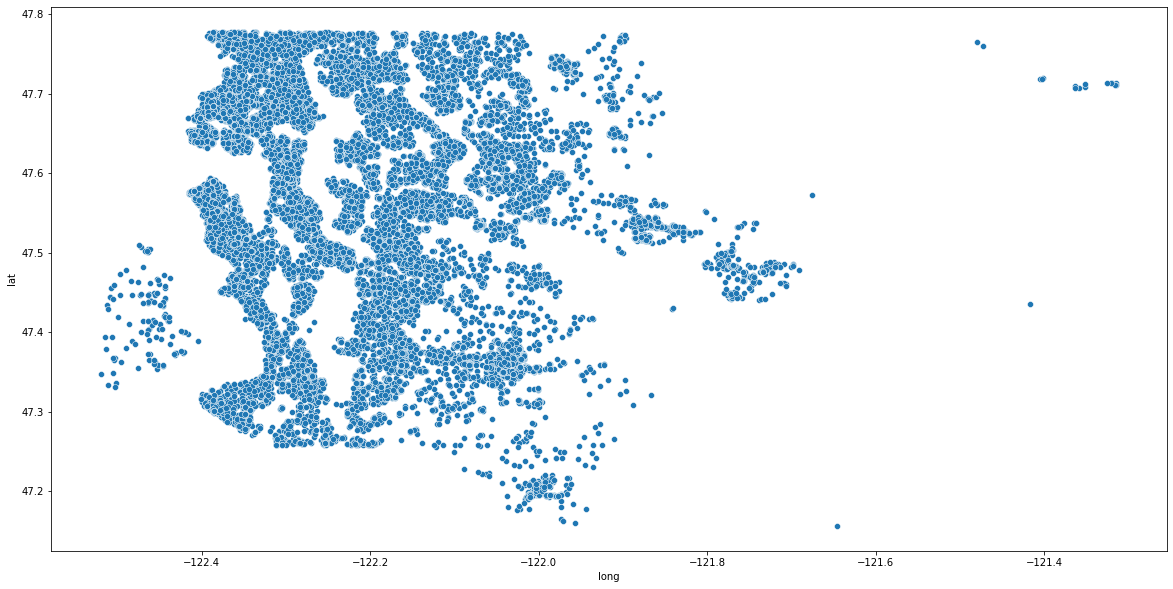

In [33]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='long',y='lat',data=df)

<AxesSubplot:xlabel='long', ylabel='lat'>

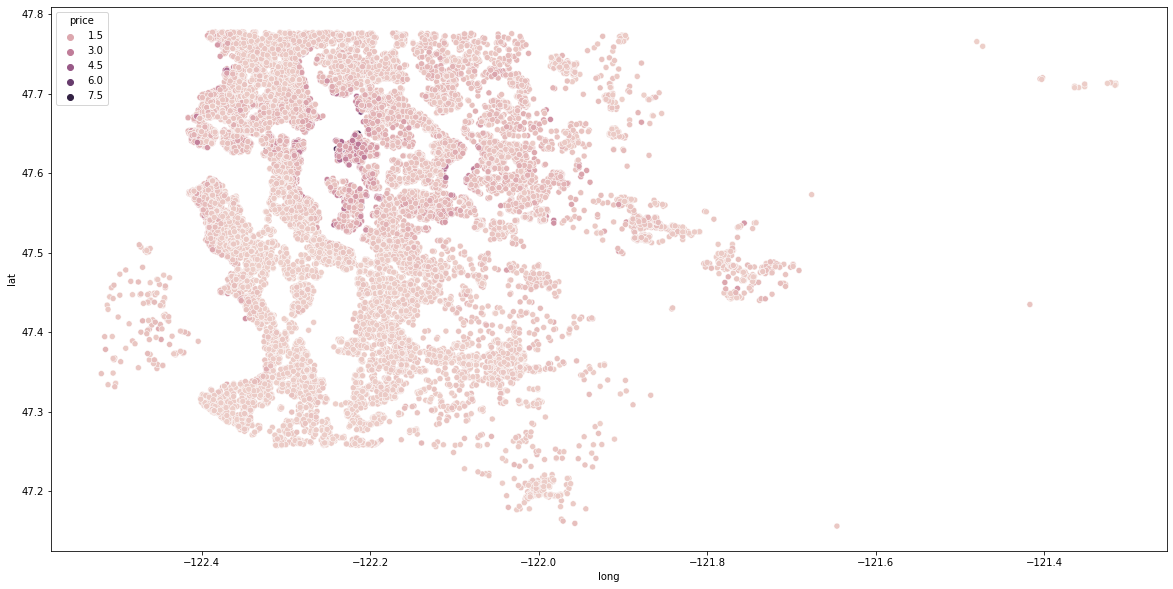

In [36]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='long',y='lat',data=df,hue='price')

In [40]:
df.sort_values(by='price',ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [41]:
len(df)

21597

In [43]:
len(df)* 0.01

215.97

In [52]:
non_top_1_perc = df.sort_values('price',ascending=False).iloc[216:]

In [53]:
non_top_1_perc

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6329,824059321,6/2/2014,1970000.0,4,3.50,4370,8510,2.0,0,1,...,10,3610,760,2003,0,98004,47.5876,-122.204,2960,10347
12271,1923000260,10/15/2014,1960000.0,5,4.50,6200,23373,3.0,0,1,...,11,5050,1150,1988,0,98040,47.5632,-122.215,3700,14486
9166,3124059023,2/13/2015,1960000.0,3,1.75,3330,12566,1.0,1,4,...,8,1940,1390,1960,0,98040,47.5287,-122.220,3730,16560
12565,2806300065,4/22/2015,1960000.0,4,4.00,4430,31353,2.0,0,0,...,12,4430,0,1998,0,98005,47.6422,-122.157,3900,35237
1150,4055701200,4/21/2015,1960000.0,4,2.75,3120,7898,1.0,1,4,...,8,1560,1560,1963,0,98034,47.7165,-122.259,2630,13868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,1623049041,5/8/2014,82500.0,2,1.00,520,22334,1.0,0,0,...,5,520,0,1951,0,98168,47.4799,-122.296,1572,10570
8267,3883800011,11/5/2014,82000.0,3,1.00,860,10426,1.0,0,0,...,6,860,0,1954,0,98146,47.4987,-122.341,1140,11250
16184,3028200080,3/24/2015,81000.0,2,1.00,730,9975,1.0,0,0,...,5,730,0,1943,0,98168,47.4808,-122.315,860,9000
465,8658300340,5/23/2014,80000.0,1,0.75,430,5050,1.0,0,0,...,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500


<AxesSubplot:xlabel='long', ylabel='lat'>

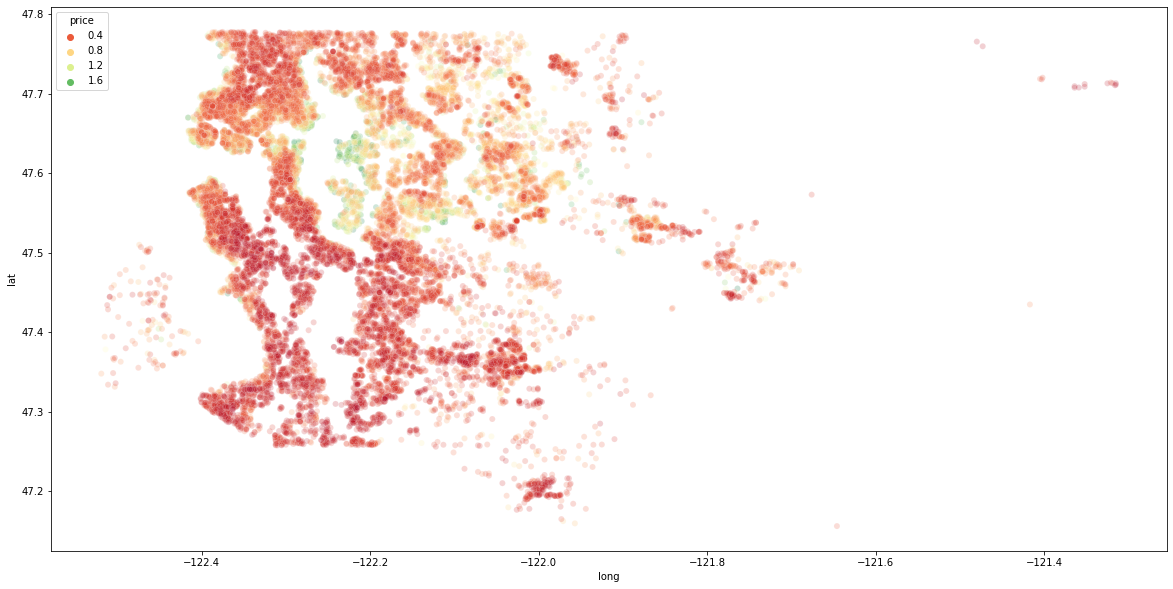

In [57]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='long',y='lat',data=non_top_1_perc,hue='price',alpha=0.2,palette='RdYlGn')

<AxesSubplot:xlabel='waterfront', ylabel='price'>

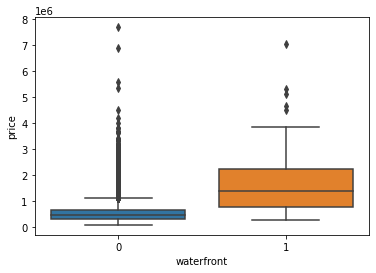

In [58]:
sns.boxplot(x='waterfront',y='price',data=df)

In [59]:
## feature engineering 

In [60]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [61]:
df.drop('id',axis=1,inplace=True)

In [62]:
df['date'] = pd.to_datetime(df['date'])

In [63]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [64]:
df['year']= df['date'].apply(lambda date:date.year)

In [65]:
df['month']= df['date'].apply(lambda date:date.month)

In [67]:
df.head().transpose()

,0,1,2,3,4
date,2014-10-13 00:00:00,2014-12-09 00:00:00,2015-02-25 00:00:00,2014-12-09 00:00:00,2015-02-18 00:00:00
price,221900,538000,180000,604000,510000
bedrooms,3,3,2,4,3
bathrooms,1,2.25,1,3,2
sqft_living,1180,2570,770,1960,1680
sqft_lot,5650,7242,10000,5000,8080
floors,1,2,1,1,1
waterfront,0,0,0,0,0
view,0,0,0,0,0
condition,3,3,3,5,3


<AxesSubplot:xlabel='month', ylabel='price'>

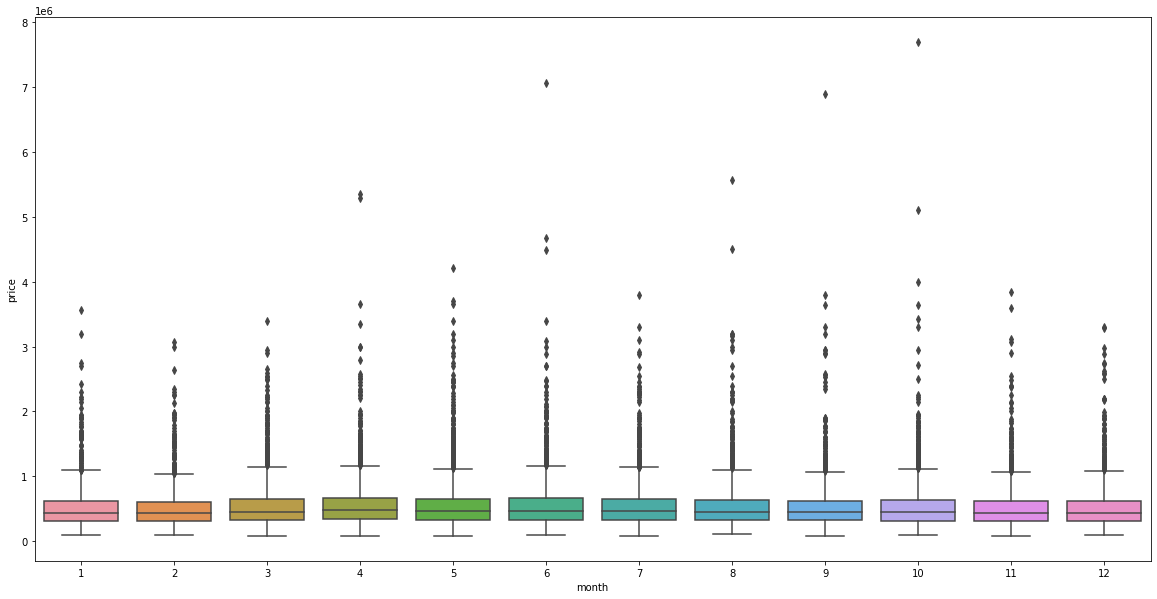

In [68]:
plt.figure(figsize=(20,10))
sns.boxplot(x='month',y='price',data=df)

<AxesSubplot:xlabel='year', ylabel='price'>

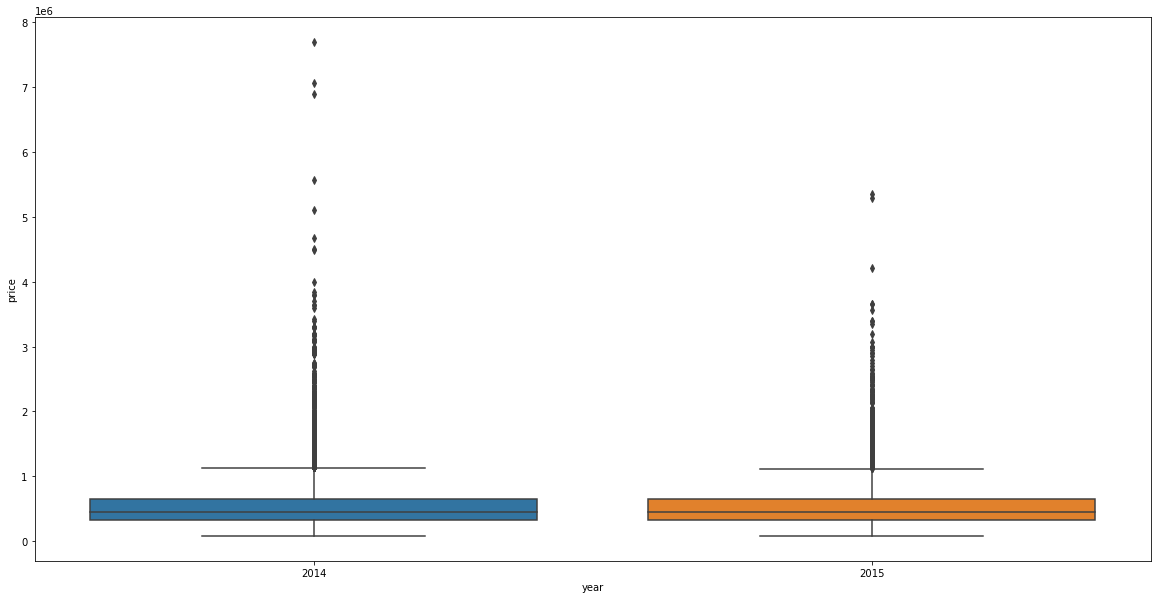

In [69]:
plt.figure(figsize=(20,10))
sns.boxplot(x='year',y='price',data=df)

<AxesSubplot:xlabel='month'>

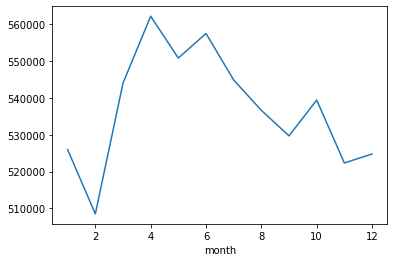

In [73]:
df.groupby('month').mean()['price'].plot()

<AxesSubplot:xlabel='year'>

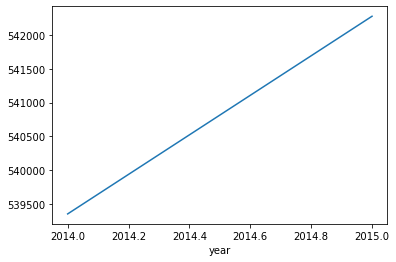

In [72]:
df.groupby('year').mean()['price'].plot()

In [74]:
df.drop('date',inplace=True,axis=1)

In [76]:
df.head().transpose()

,0,1,2,3,4
price,221900.0000,538000.000,180000.0000,604000.0000,510000.0000
bedrooms,3.0000,3.000,2.0000,4.0000,3.0000
bathrooms,1.0000,2.250,1.0000,3.0000,2.0000
sqft_living,1180.0000,2570.000,770.0000,1960.0000,1680.0000
sqft_lot,5650.0000,7242.000,10000.0000,5000.0000,8080.0000
floors,1.0000,2.000,1.0000,1.0000,1.0000
waterfront,0.0000,0.000,0.0000,0.0000,0.0000
view,0.0000,0.000,0.0000,0.0000,0.0000
condition,3.0000,3.000,3.0000,5.0000,3.0000
grade,7.0000,7.000,6.0000,7.0000,8.0000


In [77]:
df = df.drop('zipcode',axis=1)

In [84]:
len(df[df['yr_renovated'] != 0])

914

In [85]:
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [86]:
df['sqft_basement'].value_counts()

0       13110
600       221
700       218
500       214
800       206
        ...  
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

### Model building

In [87]:
X = df.drop('price',axis=1).values


In [88]:
y = df['price']

In [89]:
from sklearn.model_selection import train_test_split

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

## Scaling

In [112]:
from sklearn.preprocessing import MinMaxScaler

In [113]:
scaler = MinMaxScaler()

In [114]:
X_train = scaler.fit_transform(X_train)

In [115]:
X_test = scaler.fit_transform(X_test)

In [116]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [117]:
X_train.shape

(15117, 19)

In [118]:
model = Sequential()

##Layers
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))

##Output
model.add(Dense(1))




In [119]:
model.compile(optimizer='adam',loss='mse')

In [120]:
model.fit(x=X_train,
          y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128,
          epochs=400
         ) 

Epoch 1/400
119/119 [==============================] - 1s 2ms/step - loss: 431586949802.6667 - val_loss: 418930786304.0000
Epoch 2/400
119/119 [==============================] - 0s 820us/step - loss: 431473573068.8000 - val_loss: 416422133760.0000
Epoch 3/400
119/119 [==============================] - 0s 837us/step - loss: 418603083639.4667 - val_loss: 394314088448.0000
Epoch 4/400
119/119 [==============================] - 0s 837us/step - loss: 398190076177.0667 - val_loss: 313389809664.0000
Epoch 5/400
119/119 [==============================] - 0s 820us/step - loss: 282290457941.3333 - val_loss: 175273902080.0000
Epoch 6/400
119/119 [==============================] - 0s 837us/step - loss: 166408158208.0000 - val_loss: 103729946624.0000
Epoch 7/400
119/119 [==============================] - 0s 828us/step - loss: 105596032477.8667 - val_loss: 96328966144.0000
Epoch 8/400
119/119 [==============================] - 0s 824us/step - loss: 106997168401.0667 - val_loss: 94776483840.0000
Epoc

119/119 [==============================] - 0s 950us/step - loss: 41615795404.8000 - val_loss: 46662344704.0000
Epoch 68/400
119/119 [==============================] - 0s 816us/step - loss: 38694363528.5333 - val_loss: 46008225792.0000
Epoch 69/400
119/119 [==============================] - 0s 811us/step - loss: 42072584635.7333 - val_loss: 45664305152.0000
Epoch 70/400
119/119 [==============================] - 0s 803us/step - loss: 42208473941.3333 - val_loss: 45551656960.0000
Epoch 71/400
119/119 [==============================] - 0s 807us/step - loss: 41720129382.4000 - val_loss: 45985832960.0000
Epoch 72/400
119/119 [==============================] - 0s 803us/step - loss: 38767645201.0667 - val_loss: 44468113408.0000
Epoch 73/400
119/119 [==============================] - 0s 862us/step - loss: 37706753962.6667 - val_loss: 44766674944.0000
Epoch 74/400
119/119 [==============================] - 0s 803us/step - loss: 41580050636.8000 - val_loss: 44243398656.0000
Epoch 75/400
119/119 

Epoch 133/400
119/119 [==============================] - 0s 797us/step - loss: 34463825169.0667 - val_loss: 35706839040.0000
Epoch 134/400
119/119 [==============================] - 0s 806us/step - loss: 33952128921.6000 - val_loss: 36150915072.0000
Epoch 135/400
119/119 [==============================] - 0s 820us/step - loss: 33455500185.6000 - val_loss: 36050829312.0000
Epoch 136/400
119/119 [==============================] - 0s 800us/step - loss: 34017332172.8000 - val_loss: 37912813568.0000
Epoch 137/400
119/119 [==============================] - 0s 816us/step - loss: 31528513689.6000 - val_loss: 34584043520.0000
Epoch 138/400
119/119 [==============================] - 0s 810us/step - loss: 33211795541.3333 - val_loss: 36461981696.0000
Epoch 139/400
119/119 [==============================] - 0s 801us/step - loss: 34874530167.4667 - val_loss: 35314475008.0000
Epoch 140/400
119/119 [==============================] - 0s 813us/step - loss: 34481694993.0667 - val_loss: 35570446336.0000


119/119 [==============================] - 0s 811us/step - loss: 31892702822.4000 - val_loss: 35222605824.0000
Epoch 199/400
119/119 [==============================] - 0s 805us/step - loss: 30480757742.9333 - val_loss: 34356228096.0000
Epoch 200/400
119/119 [==============================] - 0s 801us/step - loss: 30966528836.2667 - val_loss: 34818658304.0000
Epoch 201/400
119/119 [==============================] - 0s 802us/step - loss: 30473307716.2667 - val_loss: 34165549056.0000
Epoch 202/400
119/119 [==============================] - 0s 794us/step - loss: 29976407381.3333 - val_loss: 34374410240.0000
Epoch 203/400
119/119 [==============================] - 0s 796us/step - loss: 32269539976.5333 - val_loss: 33824722944.0000
Epoch 204/400
119/119 [==============================] - 0s 800us/step - loss: 30451296068.2667 - val_loss: 34430431232.0000
Epoch 205/400
119/119 [==============================] - 0s 804us/step - loss: 31667117414.4000 - val_loss: 34913501184.0000
Epoch 206/400


119/119 [==============================] - 0s 808us/step - loss: 30705929190.4000 - val_loss: 34564968448.0000
Epoch 264/400
119/119 [==============================] - 0s 803us/step - loss: 30456699750.4000 - val_loss: 33378744320.0000
Epoch 265/400
119/119 [==============================] - 0s 822us/step - loss: 32696286890.6667 - val_loss: 34161338368.0000
Epoch 266/400
119/119 [==============================] - 0s 862us/step - loss: 31224062242.1333 - val_loss: 33127649280.0000
Epoch 267/400
119/119 [==============================] - 0s 871us/step - loss: 30803275707.7333 - val_loss: 34127482880.0000
Epoch 268/400
119/119 [==============================] - 0s 845us/step - loss: 30541032004.2667 - val_loss: 33450917888.0000
Epoch 269/400
119/119 [==============================] - 0s 812us/step - loss: 32682966988.8000 - val_loss: 33885616128.0000
Epoch 270/400
119/119 [==============================] - 0s 806us/step - loss: 28847115929.6000 - val_loss: 33613309952.0000
Epoch 271/400


119/119 [==============================] - 0s 814us/step - loss: 29682749371.7333 - val_loss: 34093631488.0000
Epoch 329/400
119/119 [==============================] - 0s 820us/step - loss: 29266224810.6667 - val_loss: 33500473344.0000
Epoch 330/400
119/119 [==============================] - 0s 820us/step - loss: 29119578060.8000 - val_loss: 34231334912.0000
Epoch 331/400
119/119 [==============================] - 0s 794us/step - loss: 29592825028.2667 - val_loss: 33592160256.0000
Epoch 332/400
119/119 [==============================] - 0s 805us/step - loss: 31076443528.5333 - val_loss: 34902118400.0000
Epoch 333/400
119/119 [==============================] - 0s 801us/step - loss: 29506811596.8000 - val_loss: 32754950144.0000
Epoch 334/400
119/119 [==============================] - 0s 808us/step - loss: 31261595630.9333 - val_loss: 33866690560.0000
Epoch 335/400
119/119 [==============================] - 0s 811us/step - loss: 31046287377.0667 - val_loss: 33545895936.0000
Epoch 336/400


119/119 [==============================] - 0s 806us/step - loss: 28802568021.3333 - val_loss: 33164005376.0000
Epoch 394/400
119/119 [==============================] - 0s 820us/step - loss: 28976627746.1333 - val_loss: 33211353088.0000
Epoch 395/400
119/119 [==============================] - 0s 796us/step - loss: 30337977924.2667 - val_loss: 34801094656.0000
Epoch 396/400
119/119 [==============================] - 0s 794us/step - loss: 30315917943.4667 - val_loss: 34308448256.0000
Epoch 397/400
119/119 [==============================] - 0s 808us/step - loss: 30547968392.5333 - val_loss: 33424640000.0000
Epoch 398/400
119/119 [==============================] - 0s 810us/step - loss: 28859295266.1333 - val_loss: 33262675968.0000
Epoch 399/400
119/119 [==============================] - 0s 812us/step - loss: 30219818939.7333 - val_loss: 33940027392.0000
Epoch 400/400
119/119 [==============================] - 0s 805us/step - loss: 30220414856.5333 - val_loss: 34136410112.0000


In [121]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

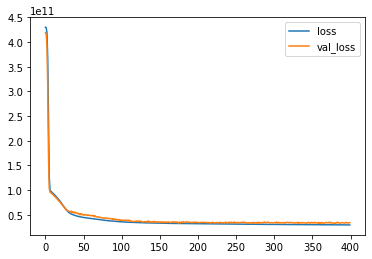

In [122]:
losses.plot()

### Evaluation

In [123]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [124]:
pred = model.predict(X_test)

In [125]:
mean_squared_error(y_test,pred)

34136409399.48953

In [126]:
mean_absolute_error(y_test,pred)

112648.4936469184

In [127]:
explained_variance_score(y_test,pred)

0.7826348009518036

### Test

In [129]:
house_new = df.drop('price',axis=1).iloc[0]


In [134]:
house_new.values

array([ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
        1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
        7.00000e+00,  1.18000e+03,  0.00000e+00,  1.95500e+03,
        0.00000e+00,  4.75112e+01, -1.22257e+02,  1.34000e+03,
        5.65000e+03,  2.01400e+03,  1.00000e+01])

In [136]:
house_new = scaler.transform(house_new.values.reshape(-1,19))

In [137]:
model.predict(house_new)

array([[248314.92]], dtype=float32)

In [138]:
df.iloc[0]

price            221900.0000
bedrooms              3.0000
bathrooms             1.0000
sqft_living        1180.0000
sqft_lot           5650.0000
floors                1.0000
waterfront            0.0000
view                  0.0000
condition             3.0000
grade                 7.0000
sqft_above         1180.0000
sqft_basement         0.0000
yr_built           1955.0000
yr_renovated          0.0000
lat                  47.5112
long               -122.2570
sqft_living15      1340.0000
sqft_lot15         5650.0000
year               2014.0000
month                10.0000
Name: 0, dtype: float64